In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile  as wavfile
import scipy
import winsound
from scipy import signal
import time

In [2]:
# Helper Functions
def fnGenSampledSinusoid(A,Freq,Phi, Fs,sTime,eTime):
    # Showing off how to use numerical python library to create arange
    n = np.arange(sTime,eTime,1.0/Fs)
    y = A*np.cos(2 * np.pi * Freq * n + Phi)
    return [n,y]

def fnGenSampledSinusoidInNT(A,Freq,Fs,sTime,eTime):
    # Showing off how to use numerical python library to create arange
    numPts = int((eTime-sTime)*Fs/2)
    n = np.arange(-numPts,numPts)
    Ts = 1/Fs   # sampling period = 1/sampling frequency
    nT = n*Ts   #(1.0/10)
    yNT = A*np.cos(2*np.pi*Freq*nT)
    return [nT,yNT]

def fnNormalizeFloatTo16Bit(yFloat):
    y_16bit = [int(s*32767) for s in yFloat]
    return(np.array(y_16bit, dtype='int16'))

def fnNormalize16BitToFloat(y_16bit):
    yFloat = [float(s/32767.0) for s in y_16bit]
    return(np.array(yFloat, dtype='float'))

## Example Code

Example of Lab2 CE3007
Example using np concolve


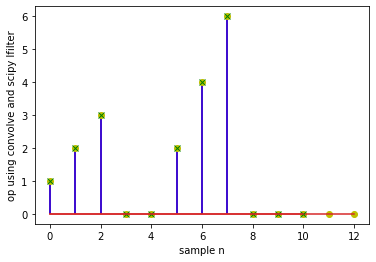

In [18]:
print("Example of Lab2 CE3007")

print("Example using np concolve")
# note that when we process, we WILL use floating point array
# hence, dtype must be include in definition of np.array
h = np.array([1,2,3],dtype='float')
x = np.array([1,0,0,0,0,2,0,0,0,0,0],dtype='float')
y = np.convolve(x,h)
y2 = scipy.signal.lfilter(h,[1],x)
plt.figure()
plt.stem(y,  linefmt='r-', markerfmt='yo')
plt.stem(y2, linefmt='b-', markerfmt='gx')
plt.ylabel('op using convolve and scipy lfilter')
plt.xlabel('sample n')
plt.show()

## Lab 2

### Question 1

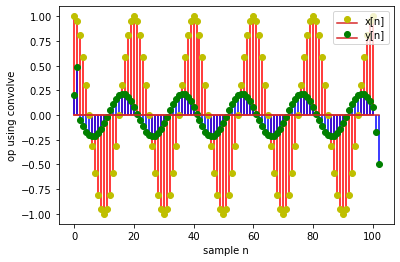

In [24]:
def q1(digital_f, A, cycles):
    et = (1/digital_f) * cycles + 1
    [n, x] = fnGenSampledSinusoid(A, digital_f, 0, 1, 0, et)
    h = np.array([0.2,0.3,-0.5],dtype='float')
    y = np.convolve(x,h)
    plt.figure()
    plt.stem(x, linefmt='r-', markerfmt='yo')
    plt.stem(y, linefmt='b-', markerfmt='go')
    plt.legend(['x[n]','y[n]'])
    plt.ylabel('op using convolve')
    plt.xlabel('sample n')
    plt.show()
    
q1(0.05,1,5)

### Question 2

### Question 3

In [4]:
def convolve(x1, x2):
    x1_size = len(x1)
    x2_size = len(x2)
    target = x1_size + x2_size - 1
    result = []
    
    pad = np.zeros(target-x1_size)
    x1 = np.concatenate((x1,pad))
    pad = np.zeros(target-x2_size)
    x2 = np.concatenate((x2, pad))
    
    for n in range(target):
        t = 0
        for k in range(n+1):
            t = t + (x1[k]*x2[n-k])
        result.append(t)
        
    return result

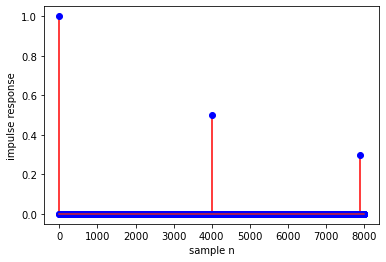

In [26]:
def q3_a():
    h = np.zeros(8000)
    h[1] = 1; h[4000] = 0.5; h[7900] = 0.3;
    plt.figure()
    plt.stem(h, linefmt='r-', markerfmt='bo')
    plt.ylabel('impulse response')
    plt.xlabel('sample n')
    plt.show()
    
q3()

In [79]:
def q3_b(filename):
    # winsound.PlaySound(filename, winsound.SND_FILENAME)
    
    [Fs, sampleX_16bit] = wavfile.read(filename)
    sampleX_float = fnNormalize16BitToFloat(sampleX_16bit)
    
    h = np.zeros(8000)
    h[1] = 1; h[4000] = 0.5; h[7900] = 0.3;
    
    y = np.convolve(sampleX_float, h)
    
    y_16bit = fnNormalizeFloatTo16Bit(y)
    wavfile.write('lab2_audio\\t2_q3b.wav', Fs, y_16bit)

filename = f"lab2_audio\\testIp_16bit.wav"
q3_b(filename)

### Question 4

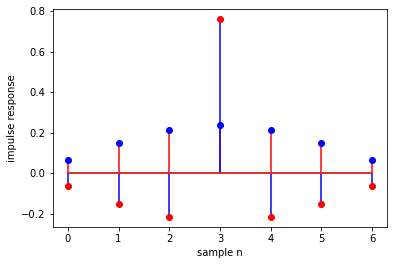

In [3]:
def q4_a():
    h1 = np.array([0.06523, 0.14936,0.21529,0.2402,0.21529,0.14936,0.06523], dtype=float)
    h2 = np.array([-0.06523, -0.14936,-0.21529,0.7598,-0.21529,-0.14936,-0.06523], dtype=float)
    plt.figure()
    plt.stem(h1, linefmt='r-', markerfmt='bo')
    plt.stem(h2, linefmt='b-', markerfmt='ro')
    plt.ylabel('impulse response')
    plt.xlabel('sample n')
    plt.show()
    
q4_a()

In [7]:
def delta(n):
    if n==0:
        return 1
    else:
        return 0

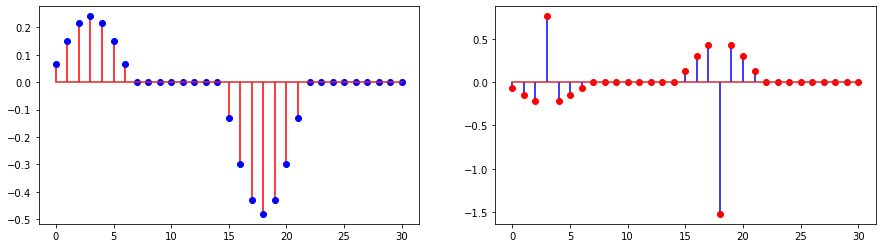

In [21]:
def q4_b():
    h1 = np.array([0.06523, 0.14936,0.21529,0.2402,0.21529,0.14936,0.06523], dtype=float)
    h2 = np.array([-0.06523, -0.14936,-0.21529,0.7598,-0.21529,-0.14936,-0.06523], dtype=float)
    n = np.arange(0,25)
    x = [delta(i) - 2*delta(i-15) for i in n]
    y1_test = convolve(x, h1)
    y2_test = convolve(x, h2)
    
    fig, a = plt.subplots(1,2, figsize=(15,4))
    a[0].stem(y1_test, linefmt='r-', markerfmt='bo')
    a[1].stem(y2_test, linefmt='b-', markerfmt='ro')
    plt.show()
    
q4_b()

<ipython-input-58-b9d6d2d82c92>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  a[0].pcolormesh(t, f, 10*np.log10(Sxx))
<ipython-input-58-b9d6d2d82c92>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  a[0].pcolormesh(t, f, 10*np.log10(Sxx))
<ipython-input-58-b9d6d2d82c92>:41: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pa

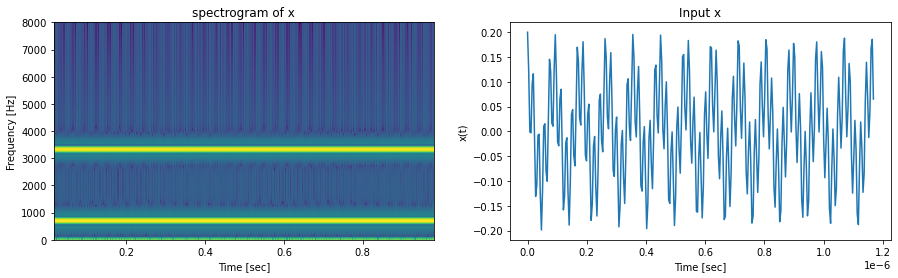

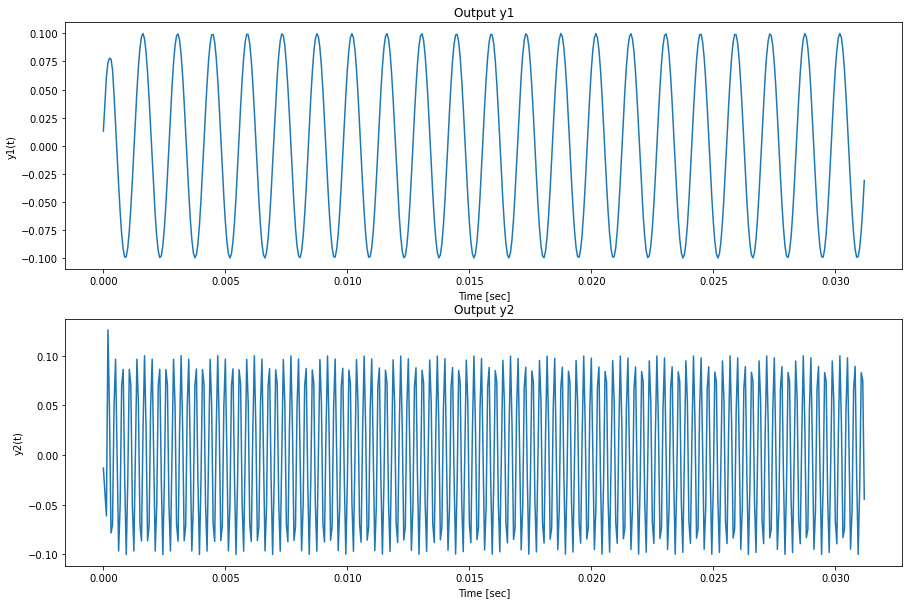

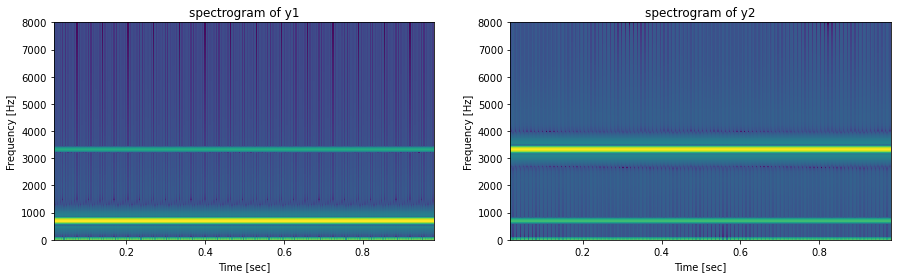

In [58]:
def q4_c(playSound=False):
    n1, x1 = fnGenSampledSinusoid(0.1, 700, 0, 16000, 0, 1)
    n2, x2 = fnGenSampledSinusoid(0.1, 3333, 0, 16000, 0, 1)
    x = x1+x2
    
    h1 = np.array([0.06523, 0.14936, 0.21529, 0.2402, 0.21529, 0.14936, 0.06523], dtype='float')
    h2 = np.array([-0.06523, -0.14936, -0.21529, 0.7598, -0.21529, -0.14936, -0.06523], dtype='float')

    fig, a = plt.subplots(1,2,figsize=(15,4))
    [f, t, Sxx] = signal.spectrogram(x, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
    a[0].pcolormesh(t, f, 10*np.log10(Sxx))
    a[0].set_ylabel('Frequency [Hz]')
    a[0].set_xlabel('Time [sec]')
    a[0].set_title('spectrogram of x')
    a[1].plot(n1[:300]/16000, x[:300])
    a[1].set_title("Input x")
    a[1].set_ylabel('x(t)')
    a[1].set_xlabel('Time [sec]')
    
    y1 = np.convolve(x, h1)
    y2= np.convolve(x, h2)
    t = np.arange(0, len(y1), 1) * (1 / 16000)
    
    fig, a = plt.subplots(2,1,figsize=(15,10))
    a[0].plot(t[:500], y1[:500])
    a[0].set_title("Output y1")
    a[0].set_ylabel('y1(t)')
    a[0].set_xlabel('Time [sec]')
    a[1].plot(t[:500], y2[:500])
    a[1].set_title("Output y2")
    a[1].set_ylabel('y2(t)')
    a[1].set_xlabel('Time [sec]')
    
    fig, a = plt.subplots(1,2,figsize=(15,4))
    [f, t, Sxx] = signal.spectrogram(y1, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
    a[0].pcolormesh(t, f, 10*np.log10(Sxx))
    a[0].set_ylabel('Frequency [Hz]')
    a[0].set_xlabel('Time [sec]')
    a[0].set_title('spectrogram of y1')
    [f, t, Sxx] = signal.spectrogram(y2, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
    a[1].pcolormesh(t, f, 10*np.log10(Sxx))
    a[1].set_ylabel('Frequency [Hz]')
    a[1].set_xlabel('Time [sec]')
    a[1].set_title('spectrogram of y2')
    plt.show()
    
    y1_16bit = fnNormalizeFloatTo16Bit(y1)
    wavfile.write('t2_4c\\y1.wav', 16000, y1_16bit)
    y2_16bit = fnNormalizeFloatTo16Bit(y2)
    wavfile.write('t2_4c\\y2.wav', 16000, y2_16bit)
    x_16bit = fnNormalizeFloatTo16Bit(x)
    wavfile.write('t2_4c\\x.wav', 16000, x_16bit)
    if playSound:
        winsound.PlaySound('t2_4c\\x', winsound.SND_FILENAME)
        time.sleep(1)
        winsound.PlaySound('t2_4c\\y1', winsound.SND_FILENAME)
        time.sleep(1)
        winsound.PlaySound('t2_4c\\y2', winsound.SND_FILENAME)
        time.sleep(1)
    
q4_c()

System 1 is a low pass filter, whereas system 2 is a high pass filter

### Question 5

<ipython-input-61-c28aed66837d>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(t, f, 10*np.log10(Sxx))


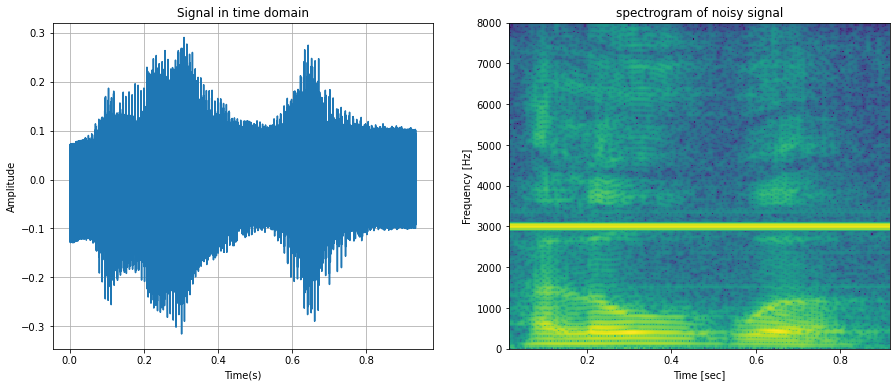

In [61]:
def q5_a():
    #Load the sound file
    ipnoisyfilename = 'lab2_audio\helloworld_noisy_16bit.wav'
    winsound.PlaySound(ipnoisyfilename, winsound.SND_FILENAME)
    Fs, sampleX_16bit = wavfile.read(ipnoisyfilename)
    x = fnNormalize16BitToFloat(sampleX_16bit)
    
    #Spectrogram stuffs (always in float)
    f, ax = plt.subplots(1, 2, figsize=(15,6))
    [f, t, Sxx] = signal.spectrogram(x, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
    t1 = np.arange(0, len(x), 1) * (1 / 16000)

    ax[0].plot(t1, x)
    ax[0].grid()
    ax[0].set_title('Signal in time domain')
    ax[0].set_xlabel('Time(s)')
    ax[0].set_ylabel('Amplitude')
    ax[1].pcolormesh(t, f, 10*np.log10(Sxx))
    ax[1].set_ylabel('Frequency [Hz]')
    ax[1].set_xlabel('Time [sec]')
    ax[1].set_title('spectrogram of noisy signal')

    plt.show()

q5_a()

#### 5b
<img src="DF-I Filter_q5.png" alt="Direct Form Implementation of Filter" style="height:250px; width:500px;"/>

$$y(n) = x(n) - 0.7653668\cdot x(n-1) + 0.99999\cdot x(n-2) + 0.722744 \cdot y(n-1) - 0.888622 \cdot y(n-2)$$

In [120]:
# Question 5c

def mylfilter(B,A,X):
    numB = len(B)
    memB = np.zeros(numB)
    B_np  = np.array(B)

    numA = len(A)
    memA = np.zeros(numA)
    A_np = np.array(A)
    
    y = np.zeros(len(X))
    for i in np.arange(len(X)):
        # doing the left side of DF1 structure
        memB[0] = X[i]   #rolling in the memory X input    
        vec_left_op = np.multiply(memB,B_np)
        
        # doing the right side of DF1 structure 
        vec_right_op = np.multiply(memA[1:], -1*A_np[1:])
        # output
        y[i] = np.sum(vec_right_op) + np.sum(vec_left_op)
        memA[0] = y[i]
        
        memB = np.roll(memB,1) # getting ready for the next step
        memA = np.roll(memA, 1)
        memB[0] = 0  # we use roll, so circular shift, lets 0 shifted in element 0
        memA[0] = 0

    return y

<ipython-input-123-8e19ac47d6c9>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[1].pcolormesh(t, f, 10*np.log10(Sxx))


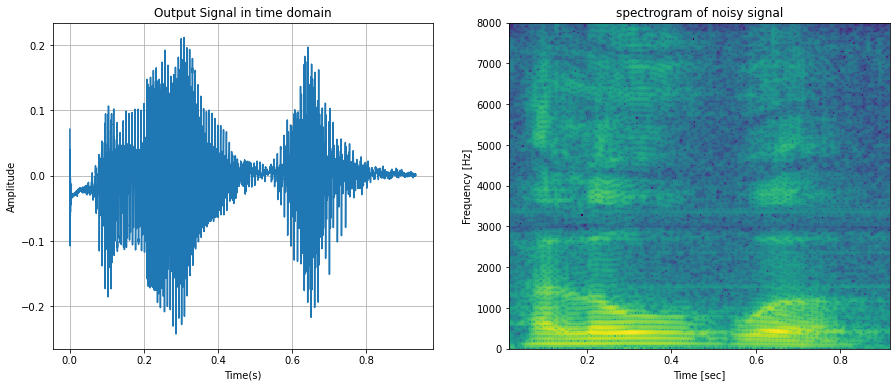

In [123]:
def q5_d():
    ipnoisyfilename = 'lab2_audio\helloworld_noisy_16bit.wav'
    # winsound.PlaySound(ipnoisyfilename, winsound.SND_FILENAME)
    Fs, sampleX_16bit = wavfile.read(ipnoisyfilename)
    x = fnNormalize16BitToFloat(sampleX_16bit)
    num = [1, -0.7653668, 0.99999]
    den = [1, -0.722744, 0.888622]
    
    y = mylfilter(num, den, x)
    
    y_16bit = fnNormalizeFloatTo16Bit(y)
    wavfile.write('y5d.wav', 16000, y_16bit)
    winsound.PlaySound('y5d.wav', winsound.SND_FILENAME)
    
    f, ax = plt.subplots(1, 2, figsize=(15,6))
    [f, t, Sxx] = signal.spectrogram(y, 16000, window=('blackmanharris'),nperseg=512,noverlap=int(0.9*512))
    t1 = np.arange(0, len(y), 1) * (1 / 16000)

    ax[0].plot(t1, y)
    ax[0].grid()
    ax[0].set_title('Output Signal in time domain')
    ax[0].set_xlabel('Time(s)')
    ax[0].set_ylabel('Amplitude')
    ax[1].pcolormesh(t, f, 10*np.log10(Sxx))
    ax[1].set_ylabel('Frequency [Hz]')
    ax[1].set_xlabel('Time [sec]')
    ax[1].set_title('spectrogram of noisy signal')

    plt.show()
    
q5_d()